In [2]:
import pandas as pd
import numpy as np


In [3]:
data=pd.read_csv('height_and_weight.csv')
data.head(5)

,Index,Height(In),Weight(lbs)
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


In [4]:
data.drop('Index', inplace=True,axis=1)

In [5]:
data.head(5)

,Height(In),Weight(lbs)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [6]:
#importing required ML LIBRARY

from sklearn.linear_model import LinearRegression

In [7]:
inp_x=data.drop('Weight(lbs)',axis=1)

inp_x.head(5)


,Height(In)
0,65.78
1,71.52
2,69.40
3,68.22
4,67.79


In [8]:
oup_y=data.drop('Height(In)',axis=1)

oup_y.head(5)

,Weight(lbs)
0,112.99
1,136.49
2,153.03
3,142.34
4,144.30


array([[<AxesSubplot:title={'center':'Height(In)'}>,
        <AxesSubplot:title={'center':'Weight(lbs)'}>]], dtype=object)

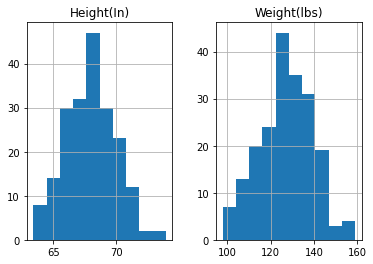

In [9]:
data.hist()

In [11]:
Model = LinearRegression()

Model.fit(inp_x,oup_y)

LinearRegression()

In [12]:
#To make predictions

Model.predict([[60]])                #input= 60 inches height

array([[99.93286131]])

                           TESTING MODEL PREDICTIONS



Here, we divide our data set into training and testing data sets.
Further we train our model using training data set and using testing data set we can have the accuracy of our model.

In [30]:
from sklearn.model_selection import train_test_split

# diving our data set 

height=data.drop('Weight(lbs)',axis=1)
weight=data.drop('Height(In)',axis=1)


#   used slicing for manually dividing dataset

 #training dataset
X_train=height.values[:180]
Y_train=weight.values[:180]

# #testing set 
X_test=height.values[180:]
Y_test=weight.values[180:]

#X_train,X_test,Y_train,Y_test=train_test_split(height,weight,test_size=0.2)



In [14]:
X_train

,Height(In)
125,65.63
142,68.01
30,69.52
24,67.63
164,65.31
...,...
9,66.78
171,67.97
57,66.54
105,68.02


In [31]:
model_1=LinearRegression()

model_1.fit(X_train,Y_train)

LinearRegression()

In [32]:
pred_y=model_1.predict(X_test)

In [33]:
dt= pd.DataFrame({'Predicted values':pred_y.flatten(),
                    'Actual values':Y_test.flatten()})

dt

,Predicted values,Actual values
0,124.201813,135.02
1,119.891919,116.23
2,123.054825,109.17
3,129.867238,124.22
4,121.143178,141.16
5,120.204734,129.15
6,129.311123,127.87
7,122.394438,120.92
8,123.715212,127.65
9,127.573262,101.47


Flatten function of numpy is used to convert 2-D to !-D array

<AxesSubplot:>

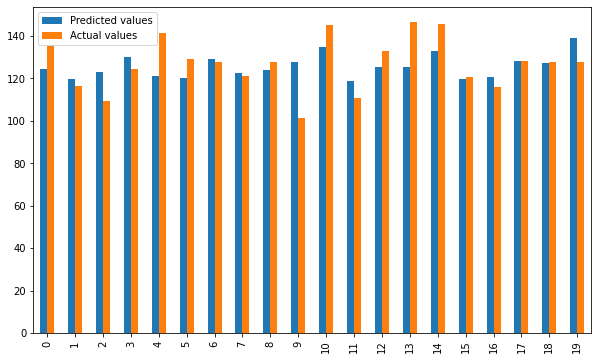

In [34]:
dt.plot.bar(figsize=(10,6))

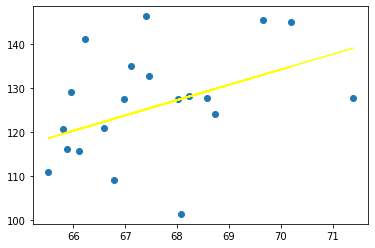

In [37]:
from matplotlib import pyplot

pyplot.scatter(X_test,Y_test)

pyplot.plot(X_test,pred_y,color='yellow')   #line plot

In [40]:
#matrix for recidual error 

from sklearn import metrics

metrics.max_error(Y_test,pred_y)

26.103262068968718

In [41]:
metrics.mean_absolute_error(Y_test,pred_y)

8.620489049733717